In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets,layers,models

In [3]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 145s 1us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

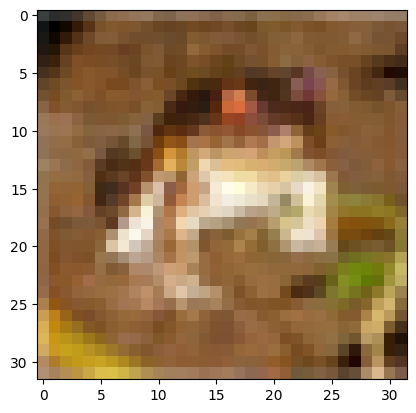

In [6]:
plt.imshow(x_train[0])

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes=['airoplan','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def plot_smaple(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

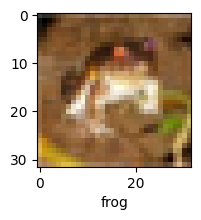

In [11]:
plot_smaple(x_train,y_train,0)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [14]:
ann=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')]
    
)

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 131s 83ms/step - loss: 1.8135 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 132s 85ms/step - loss: 1.6248 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.5450 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.4851 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.4347 - accuracy: 0.4948


In [15]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.4596 - accuracy: 0.4788


[1.459592342376709, 0.4787999987602234]

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_clas=[np.argmax(element) for element in y_pred]
print('clasification report : \n',classification_report(y_test,y_pred_clas))

313/313 [==============================] - 8s 24ms/step
clasification report : 
               precision    recall  f1-score   support

           0       0.49      0.58      0.53      1000
           1       0.64      0.55      0.59      1000
           2       0.32      0.51      0.39      1000
           3       0.37      0.34      0.35      1000
           4       0.41      0.36      0.39      1000
           5       0.41      0.38      0.40      1000
           6       0.63      0.33      0.43      1000
           7       0.59      0.54      0.56      1000
           8       0.51      0.72      0.60      1000
           9       0.62      0.48      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [19]:
cnn=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
]
)


In [20]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [21]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 59s 37ms/step - loss: 1.5064 - accuracy: 0.4582
Epoch 2/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1927 - accuracy: 0.5817
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0696 - accuracy: 0.6261
Epoch 4/5
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9877 - accuracy: 0.6551
Epoch 5/5
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9315 - accuracy: 0.6747


In [22]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9701 - accuracy: 0.6639


[0.9700725674629211, 0.6639000177383423]

In [23]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

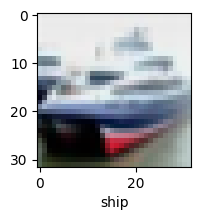

In [24]:
plot_smaple(x_test,y_test,1)


In [25]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[2.54596788e-02, 5.42965194e-04, 4.56150062e-02, 6.31063759e-01,
        7.50875007e-03, 2.32446671e-01, 6.10379083e-03, 1.40275899e-03,
        4.91169207e-02, 7.39651266e-04],
       [6.49386784e-03, 1.77371368e-01, 1.86996440e-05, 3.36389007e-06,
        1.37220002e-06, 2.19105303e-08, 3.88695616e-06, 6.92844253e-08,
        8.15137506e-01, 9.69799643e-04],
       [3.33520025e-02, 1.47205725e-01, 1.92405656e-03, 2.74360063e-03,
        2.14807224e-03, 4.16683586e-04, 1.15967810e-03, 6.20235922e-04,
        7.70305514e-01, 4.01244015e-02],
       [8.84376287e-01, 3.43101070e-04, 1.03268707e-02, 1.26629704e-04,
        1.52752525e-03, 3.21517700e-06, 6.48339163e-04, 7.88706238e-05,
        1.02447085e-01, 1.22068472e-04],
       [1.54459616e-04, 3.45060747e-04, 2.72571687e-02, 1.08583778e-01,
        3.46354127e-01, 1.79263912e-02, 4.98506010e-01, 2.25378535e-04,
        5.94899757e-04, 5.27708580e-05]], dtype=float32)

In [26]:
y_class=[np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 0, 6]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

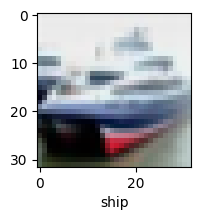

In [28]:
plot_smaple(x_test,y_test,1)

In [34]:
print(classification_report(y_test,y_class))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1000
           1       0.75      0.83      0.79      1000
           2       0.56      0.53      0.55      1000
           3       0.51      0.40      0.44      1000
           4       0.56      0.67      0.61      1000
           5       0.61      0.52      0.56      1000
           6       0.68      0.78      0.73      1000
           7       0.77      0.67      0.71      1000
           8       0.74      0.81      0.77      1000
           9       0.75      0.70      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

